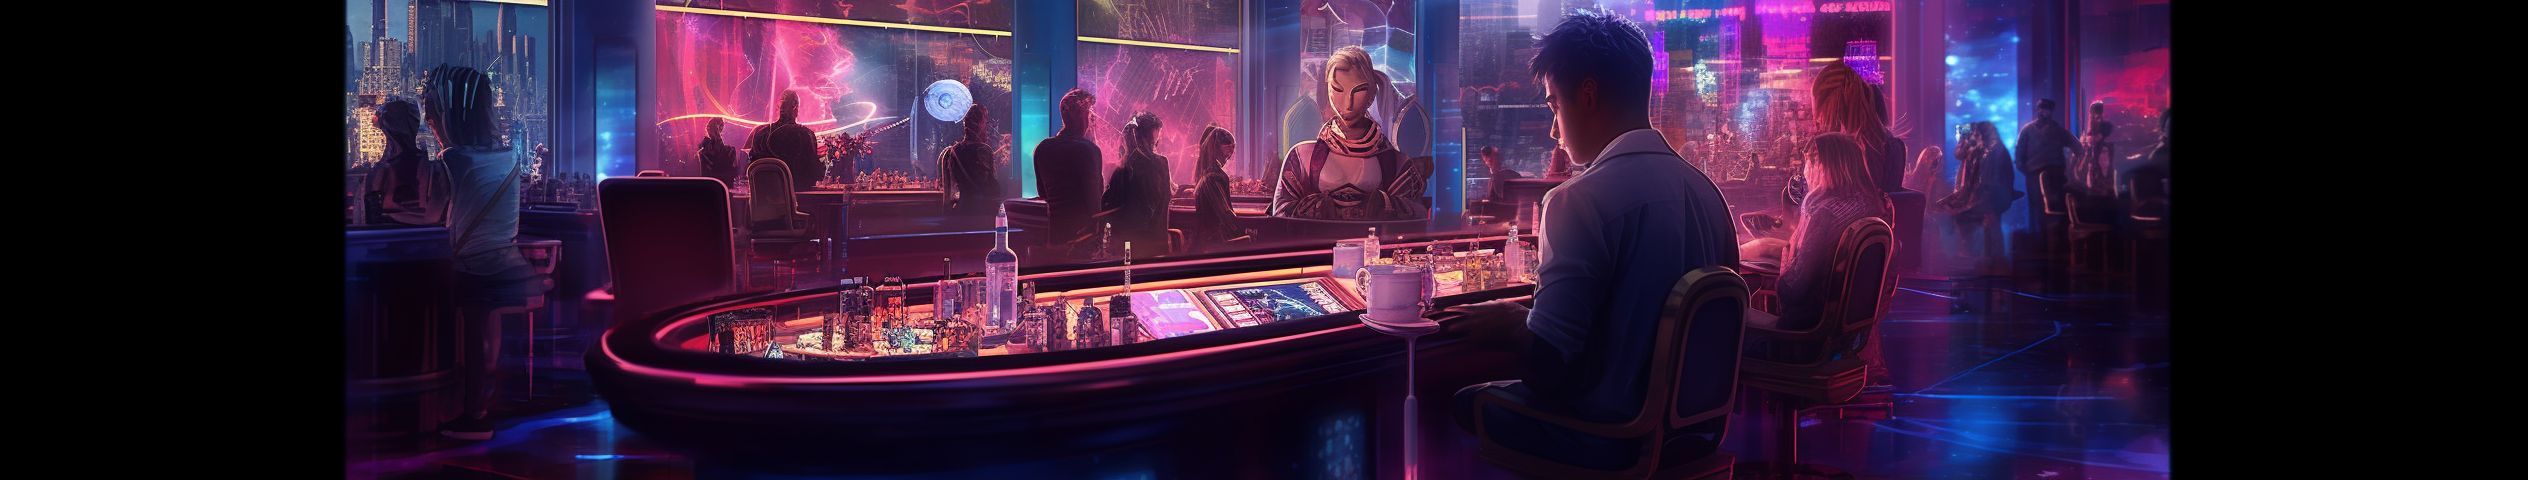

# SPY500+200MA

In [241]:
'''
本exercise中請勿使用額外的套件
Import these packages ONLY in this exercise
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# ETL Process

請將所有資料前處理的操作集中於以下的cell，並善用註解說明您的邏輯

這邊的前處理指的是針對raw data本身的操作，故此階段dataframe並不會增加任何的新column

※資料也許需要清理

---

Please put all of your data preprocessing in the cell below and include comments to better explain your logic.

The preprocessing here is referring to any operations on the raw data itself. Therefore, there is no need to add new columns to the dataframe at this point.

※ Data may require cleaning

### A. S&P500 ETF's Price Data

此檔案為 SPY 的價格資料

---

This is the file about the price data of SPY.

Open         float64
High         float64
Low          float64
Close         object
Adj Close     object
Volume         int64
dtype: object
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2015-11-03   209.970001   211.660004   209.699997          NaN   184.232925   
2018-08-31   289.839996   290.809998   289.290008   290.309998          NaN   
2020-12-08   367.720001   370.779999   367.670013   370.170013          NaN   
2022-04-29  4235.899963  4258.699951  4112.099915  4120.000000  4051.359863   
2022-05-13   396.709992   403.179993          NaN   401.720001   395.027252   

               Volume  
Date                   
2015-11-03   95246100  
2018-08-31   66140800  
2020-12-08   42458900  
2022-04-29  145491100  
2022-05-13  104174400  


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-04,123.375000,125.218750,121.718750,123.031250,79.463982,9450400
1999-01-05,122.937500,124.875000,122.937500,124.437500,80.372284,8031000
1999-01-06,125.812500,127.750000,125.750000,127.437500,82.309914,7737700
1999-01-07,126.375000,127.218750,125.781250,126.812500,81.906281,5504900
1999-01-08,128.187500,128.500000,125.968750,127.750000,82.511765,6224400
...,...,...,...,...,...,...
2023-05-01,415.470001,417.619995,415.269989,415.510010,415.510010,62122300
2023-05-02,414.769989,414.820007,407.820007,410.839996,410.839996,103998500
2023-05-03,411.359985,413.869995,407.769989,408.019989,408.019989,91531800


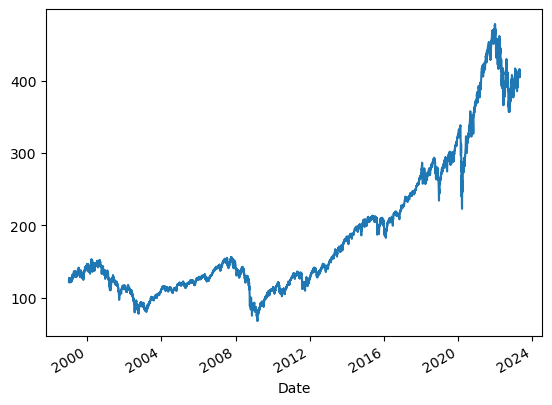

In [257]:
# Load ETFs' data
df = pd.read_csv("data\Q2_data.csv")

## TODO
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.dtypes)

cols = ['Open', 'High', 'Low', 'Close', 'Adj Close']
# Replace string with NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df[(df.isnull().any(axis=1)) | (df.applymap(lambda x: isinstance(x, str)).any(axis=1)) | (df['Open'] > 1000)])

df=df.ffill(axis=0)
for col in cols:
    df.loc[df[col] > 1000, col] = df.loc[df[col] > 1000, col] / 10
#print(df[(df.isnull().any(axis=1)) | (df.applymap(lambda x: isinstance(x, str)).any(axis=1)) | (df['Open'] > 1000)]) #final check

df['Close'].plot()
df

### B. US Unemployment Rate Data
以下為利用 FRED api 所下載的美國失業率資料，並且已知每個月的第一個禮拜五美國勞工部會公布前一個月的失業率

請將此資料處理成可用來交易的資訊 (提示: 將日期轉換成公布日)

---

This is the link of US Unempolyment rate data from FRED api, and we already knew that at the Friday of first week in each month, United States Department of Labor would release the data of last month. 

Please process the data to usable for trading. (Hint: Change the date to "release day")

           DATE  UNRATE
0    1948-01-01     3.4
1    1948-02-01     3.8
2    1948-03-01     4.0
3    1948-04-01     3.9
4    1948-05-01     3.5
..          ...     ...
899  2022-12-01     3.5
900  2023-01-01     3.4
901  2023-02-01     3.6
902  2023-03-01     3.5
903  2023-04-01     3.4

[904 rows x 2 columns]
     UNRATE RELEASE_DATE
0       3.4   1948-02-06
1       3.8   1948-03-05
2       4.0   1948-04-02
3       3.9   1948-05-07
4       3.5   1948-06-04
..      ...          ...
899     3.5   2023-01-06
900     3.4   2023-02-03
901     3.6   2023-03-03
902     3.5   2023-04-07
903     3.4   2023-05-05

[904 rows x 2 columns]


,UNRATE
RELEASE_DATE,
1948-02-06,3.4
1948-03-05,3.8
1948-04-02,4.0
1948-05-07,3.9
1948-06-04,3.5
...,...
2023-01-06,3.5
2023-02-03,3.4
2023-03-03,3.6


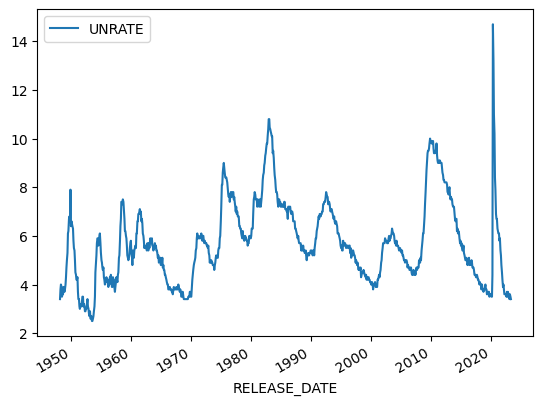

In [258]:
# Load Unemployment Rate data
df_unrate = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE&revision_date=2023-05-05&nd=1948-01-01")

## TODO
print(df_unrate)

# assuming df_rate is your DataFrame
df_unrate['DATE'] = pd.to_datetime(df_unrate['DATE'])

# Create a new column 'RELEASE_DATE'
df_unrate['RELEASE_DATE'] = df_unrate['DATE'].apply(lambda date: date + pd.offsets.MonthEnd(1) + pd.offsets.WeekOfMonth(week=0,weekday=4))

# Drop the original 'DATE' column
df_unrate = df_unrate.drop(columns=['DATE'])
print(df_unrate)


df_unrate['RELEASE_DATE'] = pd.to_datetime(df_unrate['RELEASE_DATE'])
df_unrate.set_index('RELEASE_DATE', inplace=True)
df_unrate.plot()
df_unrate

End of ETL Process

## Simple Trading Strategy

200天移動平均線是技術分析中最常用的指標之一，大部分時間被拿來定義標的處於上升或下降趨勢。
一個簡單的利用均線來追蹤趨勢的策略在過去22年中擊敗了買入並持有SPY的投資策略。

而失業率為一個簡單判斷目前總體經濟是否衰退的指標，當失業率上升時，市場普遍表現不佳。
因此也有些人會在失業率攀升時，持有現金而非投資市場。


請使用上面兩個dataframe以及上面的敘述，從2000年開始實做一個簡單的交易策略，進出場條件如下

- 進場條件（若本日收盤後符合以下條件，則在下一個交易日「開盤」時買）
    1. 月底時，SPY的收盤價高於200天的移動平均，且
    2. 公布日，該期失業率低於10個月內的平均
    

- 出場條件（若本日收盤後符合以下條件，則在下一個交易日「收盤」時賣）
    1. 月底時，SPY的收盤價低於200天的移動平均，或
    2. 公布日，該期失業率高於10個月內的平均

※ 若時間不足，允許僅使用條間發生當日之調整後收盤價進行交易

並將回測績效視覺化，請包含但不限於以下三個部份：
1. 價格、200天均線以及標記出指標啟動的價格區間
2. 指標（0或1）
3. 累積績效
4. 歷年績效比較

下圖為參考用範例

---
The 200-day moving average is one of the most popular indicators in technical analysis, often used to define whether an asset is in an upward or downward trend. A simple strategy of using moving averages to track trends has beaten the buy-and-hold strategy for SPY over the past 22 years.

On the other hand, the unemployment rate is a simple indicator to determine whether the overall economy is in a recession. When the unemployment rate rises, the market generally performs poorly. Therefore, some people hold cash instead of investing in the market when the unemployment rate is climbing.

Please implement a simple trading strategy start from 2000 that follows the following entry and exit conditions:

- Entry (If the conditions are met after the market closes, then enter the market using **opening price** on the next trading day)
    1.	At the end of the month, close price above 200-day moving average **AND**
    2.	At the release day, unemployment rate below 10-month moving average


- Exit (If the conditions are met after the market closes, then exit the market using **closing price** on the next trading day)
    1.	At the end of the month, close price below 200-day moving average **OR**
    2.	At the release day, unemployment rate above 10-month moving average

※ If time is limited, it is allowed to trade using only the adj close of the day.

Please also visualize your backtesting result. The visualization should include (but not limited to):
1.	Price, 200-day moving average and any markers that indicates the price range in which the trading signal begins
2.	Indicator (0 or 1)
3.	Cumulative performance
4.  Yearly Return

A sample visualization is attached below

Necessary: You can plot in your style



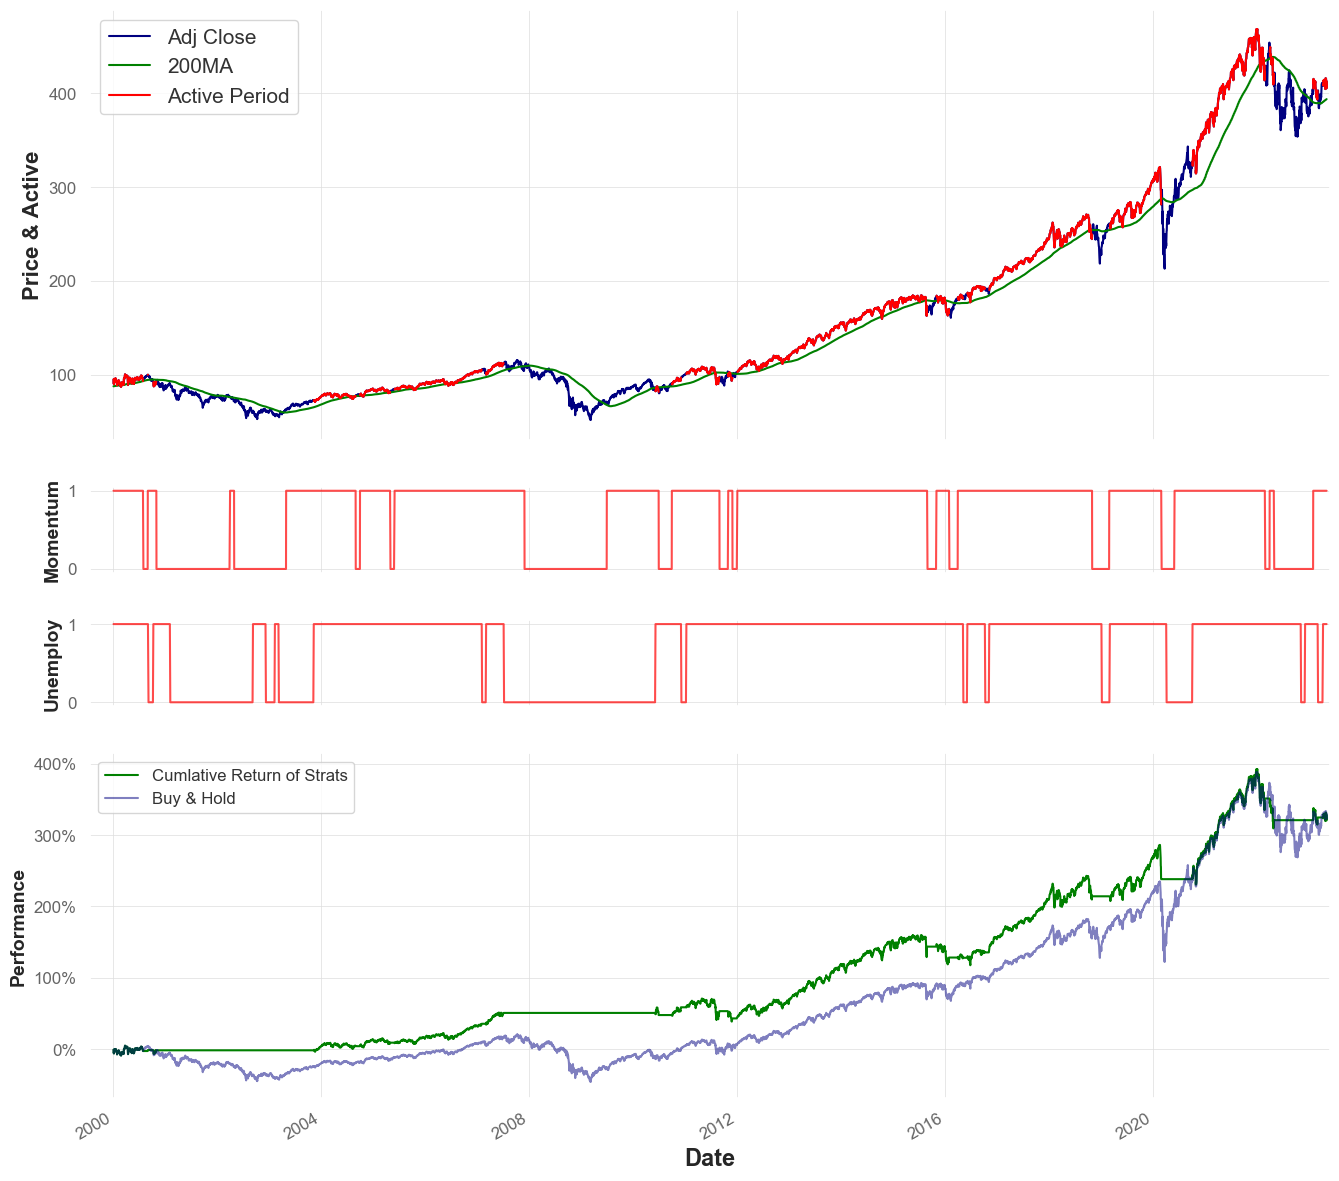

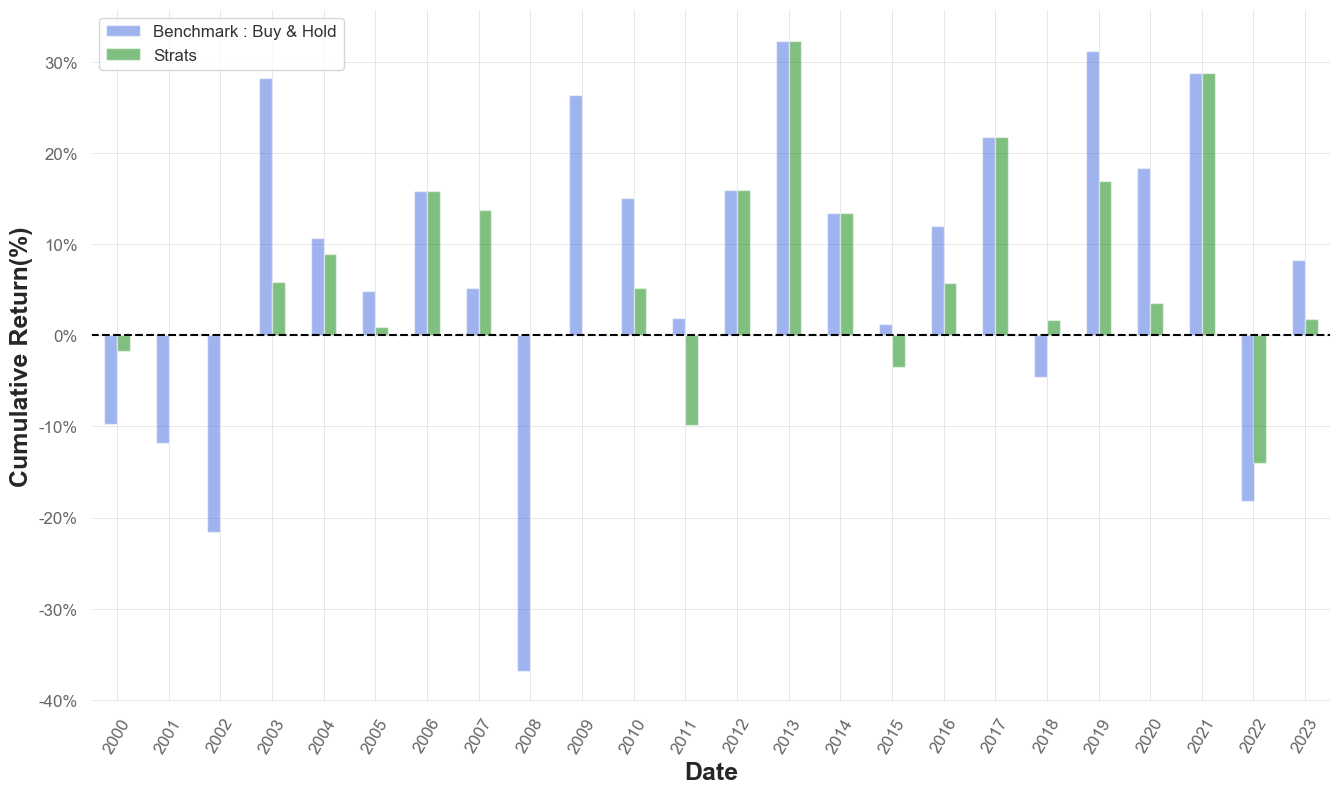

In [259]:
### To do

#Create the 200-day moving average for the ETF price and the 10-month moving average for the unemployment rate (with .rolling(window))
df['200_SMA'] = df['Close'].rolling(window=200).mean()
df_unrate['10_MA'] = df_unrate['UNRATE'].rolling(window=10).mean()
df = df.merge(df_unrate, how='left', left_index=True, right_index=True)
df=df.ffill(axis = 0)

In [260]:
'''
Entry (If the conditions are met after the market closes, then enter the market using opening price on the next trading day)
At the end of the month, close price above 200-day moving average **AND**
At the release day, unemployment rate below 10-month moving average

Exit (If the conditions are met after the market closes, then exit the market using closing price on the next trading day)
At the end of the month, close price below 200-day moving average **OR**
At the release day, unemployment rate above 10-month moving average
'''
#Set entry/exit signal
df['Signal'] = np.where((df['Close'] > df['200_SMA']) & (df['UNRATE'] < df['10_MA']), 1, 0) + np.where((df['Close'] < df['200_SMA']) | (df['UNRATE'] > df['10_MA']), -1, 0)

df['Position'] = df['Signal'].copy()
df.loc[df['Signal'] == -1, 'Position'] = 0  # Set the 'Position' as 0 where 'Signal' is -1
df.loc[df['Signal'] == 0, 'Position'] = np.nan  # Set the 'Position' as NaN where 'Signal' is 0
df['Position'] = df['Position'].shift(1)
df.loc['1999-01-04','Position'] = 0
df=df.ffill()
df['Change'] = df['Position'].diff()
#print(df.dtypes)

#print(df.loc['1999-01-02':'1999-01-10'])
#print(df.loc['1999-10-14':'1999-11-13'])
df

,Open,High,Low,Close,Adj Close,Volume,200_SMA,UNRATE,10_MA,Signal,Position,Change
Date,,,,,,,,,,,,
1999-01-04,123.375000,125.218750,121.718750,123.031250,79.463982,9450400,NaN,NaN,NaN,0,0.0,NaN
1999-01-05,122.937500,124.875000,122.937500,124.437500,80.372284,8031000,NaN,NaN,NaN,0,0.0,0.0
1999-01-06,125.812500,127.750000,125.750000,127.437500,82.309914,7737700,NaN,NaN,NaN,0,0.0,0.0
1999-01-07,126.375000,127.218750,125.781250,126.812500,81.906281,5504900,NaN,NaN,NaN,0,0.0,0.0
1999-01-08,128.187500,128.500000,125.968750,127.750000,82.511765,6224400,NaN,NaN,NaN,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,415.470001,417.619995,415.269989,415.510010,415.510010,62122300,395.721301,3.6,3.57,-1,0.0,0.0
2023-05-02,414.769989,414.820007,407.820007,410.839996,410.839996,103998500,395.849851,3.6,3.57,-1,0.0,0.0
2023-05-03,411.359985,413.869995,407.769989,408.019989,408.019989,91531800,395.980200,3.6,3.57,-1,0.0,0.0


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1999-01-04  123.375000  125.218750  121.718750  123.031250   79.463982   
1999-01-05  122.937500  124.875000  122.937500  124.437500   80.372284   
1999-01-06  125.812500  127.750000  125.750000  127.437500   82.309914   
1999-01-07  126.375000  127.218750  125.781250  126.812500   81.906281   
1999-01-08  128.187500  128.500000  125.968750  127.750000   82.511765   
...                ...         ...         ...         ...         ...   
2023-05-01  415.470001  417.619995  415.269989  415.510010  415.510010   
2023-05-02  414.769989  414.820007  407.820007  410.839996  410.839996   
2023-05-03  411.359985  413.869995  407.769989  408.019989  408.019989   
2023-05-04  406.929993  407.269989  403.739990  405.130005  405.130005   
2023-05-05  408.910004  413.720001  408.640015  412.630005  412.630005   

               Volume     200_SMA  UN

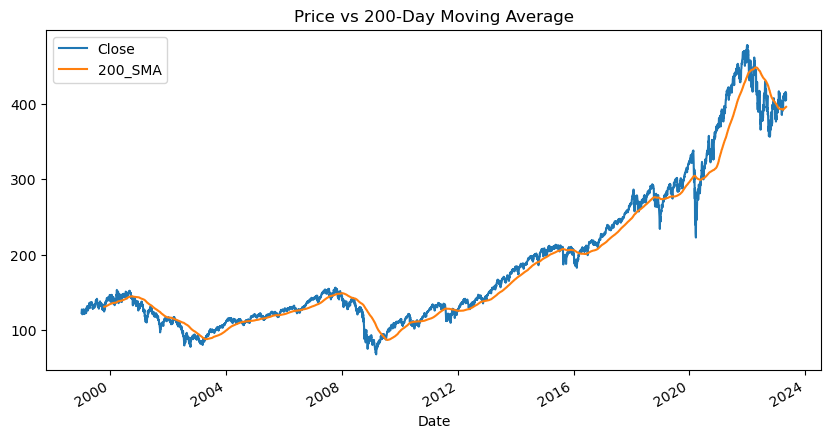

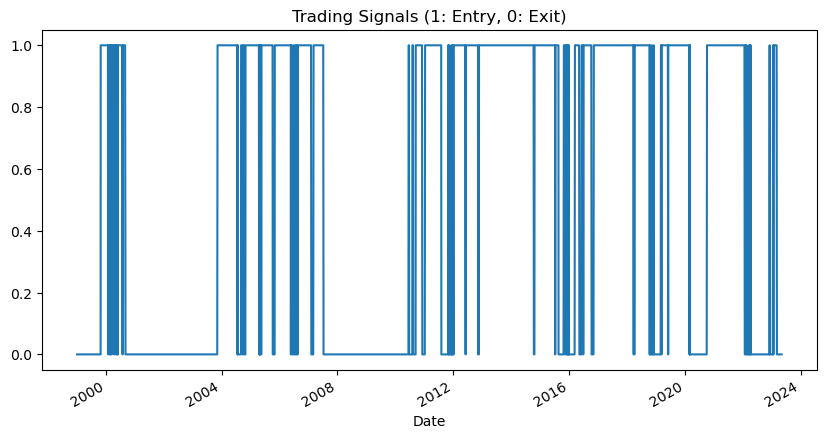

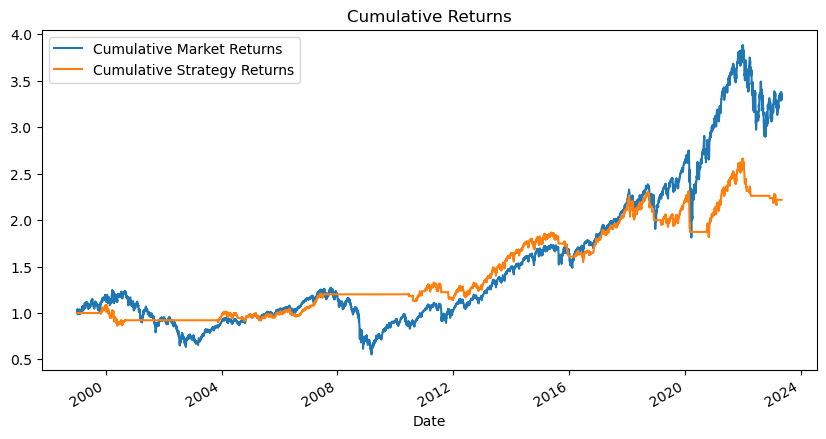

In [266]:
df['Market Returns'] = df['Close'].pct_change()
df['Daily Returns']=(df['Close']-df['Open'])/df['Open']
df['Strategy Returns'] = df['Market Returns'] * df['Position'].shift(1)+df['Daily Returns']*df['Change']
df['Cumulative Market Returns'] = (1+df['Market Returns']).cumprod()
df['Cumulative Strategy Returns'] = (1+df['Strategy Returns']).cumprod()
#df['Daily Effect']=(1+df['Daily Returns']*df['Change']).cumprod()
print(df)

# Plot the adjusted closing prices and moving average
df[['Close', '200_SMA']].plot(figsize=(10,5))
plt.title('Price vs 200-Day Moving Average')
plt.show()

# Plot the Entry/Exit signals
df['Position'].plot(figsize=(10,5))
plt.title('Trading Signals (1: Entry, 0: Exit)')
plt.show()

# Plot the cumulative returns
df[['Cumulative Market Returns', 'Cumulative Strategy Returns']].plot(figsize=(10,5))
plt.title('Cumulative Returns')
plt.show()

## Bonus
- 提升或改進策略的最終累積報酬
- 提供更詳盡的報表（如Sharpe Ratio、Max Drawdown等風險指標）

---

- Increases or improves the performance of this strategy
- Provide additional risk metrics in your backtesting result (ex. Sharpe Ratio or Max Drawdown)

## Hint
- 善用apply, indexing, conditional selection, resample, groupby 等 function
- 注意時間序列最基本的特性

---

- Utilize apply, indexing, conditional selection, resample, groupby etc. of pandas
- Pay attention to the most basic characteristic of time series

In [7]:
# Bonus

## TODO

End of Exercise 2

# Portfolio

In [309]:
'''
本exercise無限制使用的套件
No limit of packages uesd in this exercise
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Any other package, please import at here:





In [352]:
# Load ETFs' data

df = pd.read_csv("data\Q3_data.csv")

# This Data is very clean, no need for data pre-processing.
# But might need to use groupby or select

#print(df.dtypes)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,1998-12-22,23.312500,23.390625,23.187500,23.265625,12.650478,15200,XLE
1,1998-12-22,25.875000,26.531250,25.875000,26.500000,15.175959,150300,XLP
2,1998-12-22,24.812500,25.062500,24.812500,25.031250,17.650053,5700,XLV
3,1998-12-22,32.406250,32.500000,31.781250,32.046875,24.345810,300500,XLK
4,1998-12-22,23.203125,23.281250,23.203125,23.281250,15.092501,600,XLI
...,...,...,...,...,...,...,...,...
64463,2023-05-08,32.509998,32.619999,32.340000,32.380001,32.380001,34298000,XLF
64464,2023-05-08,150.949997,151.289993,150.229996,151.160004,151.160004,3397800,XLK
64465,2023-05-08,99.900002,100.070000,98.790001,99.150002,99.150002,7608600,XLI
64466,2023-05-08,76.910004,77.050003,76.690002,76.949997,76.949997,8069200,XLP


## Asset Allocation Strategy

請使用`data/Q3_data.csv`中的資產建構一個投資組合並進行回測。

該投資組合必須滿足

- 任意時間點需持有至少4個資產
- 任意時間點的持有的資產權重皆大於等於0，且權重總和皆為100％（即無槓桿、不允許放空）
- 任意時間點皆不允許look-ahead bias

回測的呈現必須包含
- 至少十年的回測區間
- 該投資組合的累積報酬率、權重分配
- 請使用`data/Q3/SPY.csv`作為benchmark

其他說明
- 不需考慮任何交易成本
- 不限制rebalancing的頻率
- 決策過程可使用除`data/Q3/`外的資料
- 配置的方式不限，可自由發揮，以下為可能的切入點
    - [Accelerating Dual Momentum](https://engineeredportfolio.com/2018/05/02/accelerating-dual-momentum-investing/)
    - [A Sector Rotation Strategy that. Beats the Market Handily. Especially During Crises.](https://boston.qwafafew.org/wp-content/uploads/sites/3/2020/09/A-Sector-Rotation-Strategy-that-Beats-the-MarketUpdated.pdf)
    - [The Principal Component Analysis Builds Better Portfolios Than Your ETF Provider](https://seekingalpha.com/instablog/51783937-desmond-m/5657200-principal-component-analysis-builds-better-portfolios-your-etf-provider)
    - etc.
    
    
※請善用註解說明您的邏輯


下圖為參考用範例

---
Please construct an investment portfolio using the assets in `data/Q3_data.csv` and perform backtesting.

The investment portfolio must meet the following criteria

- At least 4 assets must be held at any time.
- the weights of the held assets must be greater than or equal to 0, and the sum of the weights must be 100% at any time(i.e. no leverage or short selling is allowed).
- Look-ahead bias is not allowed at any time.

The backtesting results must include:
- Backtesting period of at least ten years.
- Cumulative return and weight allocation of the investment portfolio.
- Please Use SPY as benchmark

Other instructions
- Trading costs need not be considered.
- The rebalancing frequency is not limited.
- Data other than data/Q3_data can be used in the decision-making process.
- The allocation method is not limited and can be freely chosen. Possible starting points include:
    - [Accelerating Dual Momentum](https://engineeredportfolio.com/2018/05/02/accelerating-dual-momentum-investing/)
    - [A Sector Rotation Strategy that. Beats the Market Handily. Especially During Crises.](https://boston.qwafafew.org/wp-content/uploads/sites/3/2020/09/A-Sector-Rotation-Strategy-that-Beats-the-MarketUpdated.pdf)
    - [The Principal Component Analysis Builds Better Portfolios Than Your ETF Provider](https://seekingalpha.com/instablog/51783937-desmond-m/5657200-principal-component-analysis-builds-better-portfolios-your-etf-provider)
    - etc.


※Please use comments to explain your logic.

A sample visualization is attached below

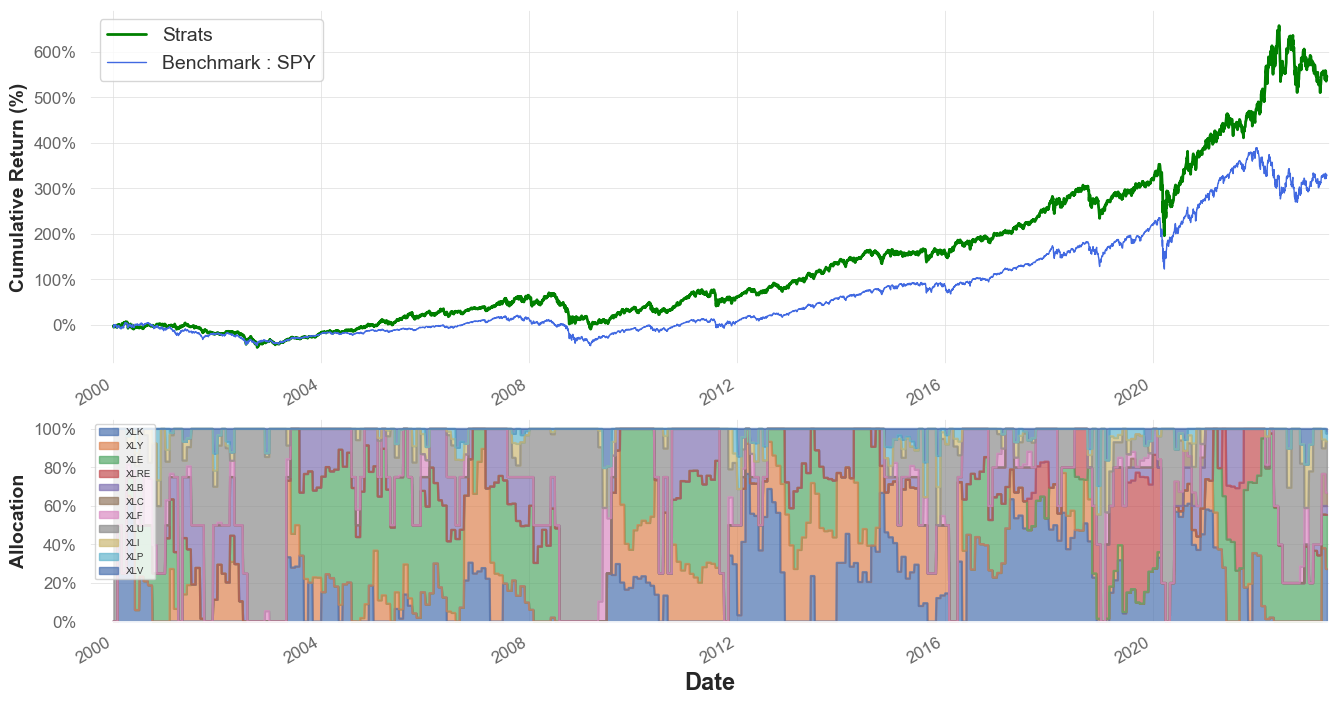

In [353]:
## To do
df['Date'] = pd.to_datetime(df['Date'])

# Pivot data to wide format
df = df.pivot(index='Date', columns='Symbol', values='Adj Close')
df

Symbol,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,,
1998-12-22,77.950180,12.128872,NaN,12.650478,11.717177,15.092501,24.345810,15.175959,NaN,12.786774,17.650053,19.223656
1998-12-23,79.585106,12.256254,NaN,12.913852,11.889949,15.355850,24.927443,15.542823,NaN,12.733188,18.046673,19.306225
1998-12-24,79.242020,12.538320,NaN,12.845877,11.968491,15.558431,24.832481,15.515983,NaN,12.967621,18.156853,19.660017
1998-12-28,79.040138,12.429136,NaN,12.777912,11.811419,15.639466,24.903698,15.426498,NaN,12.900641,17.892435,19.483118
1998-12-29,80.291550,12.656612,NaN,12.905353,11.937071,15.862307,24.974926,15.766533,NaN,13.114976,18.289059,19.907688
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,410.839996,79.730003,58.779999,80.510002,32.330002,99.489998,149.509995,77.290001,36.759998,68.260002,133.639999,146.550003
2023-05-03,408.019989,78.849998,58.549999,78.989998,31.959999,99.110001,148.250000,76.660004,36.529999,68.070000,133.460007,145.389999
2023-05-04,405.130005,78.339996,57.610001,78.110001,31.549999,98.029999,147.539993,76.470001,36.869999,68.589996,132.399994,144.270004


In [354]:
df_returns = df.pct_change()
df_returns

Symbol,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,,
1998-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-23,0.020974,0.010502,NaN,0.020819,0.014745,0.017449,0.023890,0.024174,NaN,-0.004191,0.022471,0.004295
1998-12-24,-0.004311,0.023014,NaN,-0.005264,0.006606,0.013192,-0.003810,-0.001727,NaN,0.018411,0.006105,0.018325
1998-12-28,-0.002548,-0.008708,NaN,-0.005291,-0.013124,0.005208,0.002868,-0.005767,NaN,-0.005165,-0.014563,-0.008998
1998-12-29,0.015833,0.018302,NaN,0.009973,0.010638,0.014249,0.002860,0.022042,NaN,0.016614,0.022167,0.021792
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,-0.011239,-0.009688,-0.018534,-0.043483,-0.022672,-0.010444,-0.009343,-0.002710,-0.017112,-0.012156,-0.004321,0.001025
2023-05-03,-0.006864,-0.011037,-0.003913,-0.018880,-0.011445,-0.003819,-0.008427,-0.008151,-0.006257,-0.002784,-0.001347,-0.007915
2023-05-04,-0.007083,-0.006468,-0.016055,-0.011141,-0.012829,-0.010897,-0.004789,-0.002479,0.009307,0.007639,-0.007943,-0.007703


In [355]:
#(1st test: Equal weights for the assets 'XLE', 'XLF', 'XLI', 'XLK', which is tested to beat SPY)
num_assets = 4
assets = df_returns.columns[df_pivot.columns != 'SPY'][2:num_assets+2]
print(assets)
weights = np.array([1/num_assets]*num_assets)

# Calculate portfolio returns
df_returns['Portfolio'] = df_returns[assets].mul(weights, axis=1).sum(axis=1)
df_returns['Cum_Portfolio_Returns'] = (1 + df_returns['Portfolio']).cumprod()

df_returns['Cum_SPY_Returns'] = (1 + df_returns['SPY']).cumprod()

df_returns

Index(['XLE', 'XLF', 'XLI', 'XLK'], dtype='object', name='Symbol')


Symbol,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,Portfolio,Cum_Portfolio_Returns,Cum_SPY_Returns
Date,,,,,,,,,,,,,,,
1998-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN
1998-12-23,0.020974,0.010502,NaN,0.020819,0.014745,0.017449,0.023890,0.024174,NaN,-0.004191,0.022471,0.004295,0.019226,1.019226,1.020974
1998-12-24,-0.004311,0.023014,NaN,-0.005264,0.006606,0.013192,-0.003810,-0.001727,NaN,0.018411,0.006105,0.018325,0.002681,1.021959,1.016573
1998-12-28,-0.002548,-0.008708,NaN,-0.005291,-0.013124,0.005208,0.002868,-0.005767,NaN,-0.005165,-0.014563,-0.008998,-0.002585,1.019317,1.013983
1998-12-29,0.015833,0.018302,NaN,0.009973,0.010638,0.014249,0.002860,0.022042,NaN,0.016614,0.022167,0.021792,0.009430,1.028930,1.030037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,-0.011239,-0.009688,-0.018534,-0.043483,-0.022672,-0.010444,-0.009343,-0.002710,-0.017112,-0.012156,-0.004321,0.001025,-0.021486,6.631860,5.270546
2023-05-03,-0.006864,-0.011037,-0.003913,-0.018880,-0.011445,-0.003819,-0.008427,-0.008151,-0.006257,-0.002784,-0.001347,-0.007915,-0.010643,6.561279,5.234369
2023-05-04,-0.007083,-0.006468,-0.016055,-0.011141,-0.012829,-0.010897,-0.004789,-0.002479,0.009307,0.007639,-0.007943,-0.007703,-0.009914,6.496231,5.197294


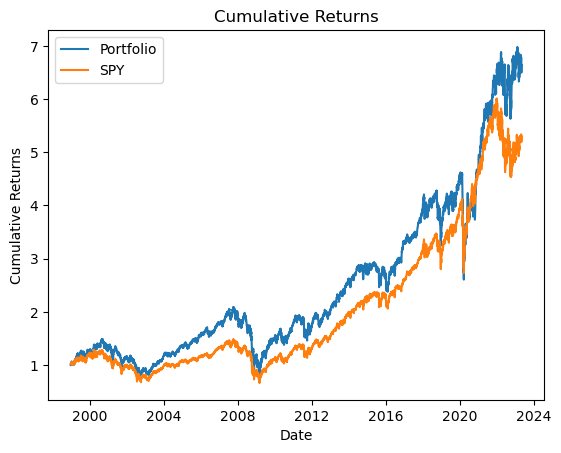

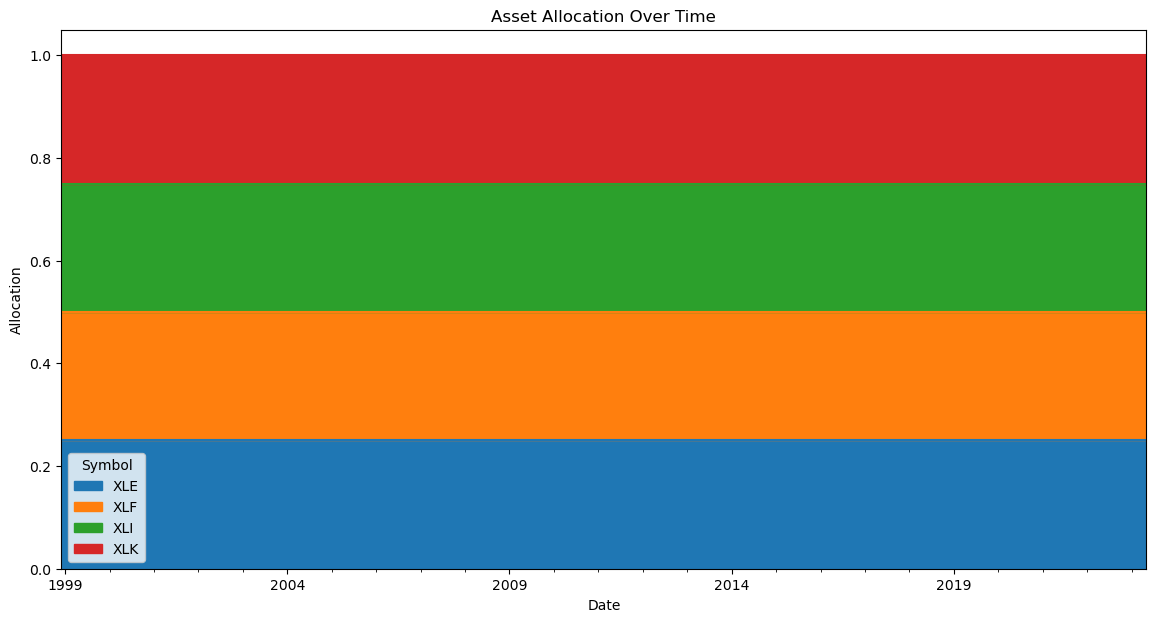

In [356]:
plt.plot(df_returns.index, df_returns['Cum_Portfolio_Returns'], label='Portfolio')
plt.plot(df_returns.index, df_returns['Cum_SPY_Returns'], label='SPY')

# Set the title and labels of the plot
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

# Allocation visualization
# Compute equal weights at the start of each month
df_weights = pd.DataFrame(index=df_returns.index, columns=assets)
df_weights[:] = 1/num_assets

# Assuming monthly rebalancing, forward fill the weights
df_weights = df_weights.resample('M').first().ffill()

# Plotting
fig, ax = plt.subplots(figsize=(14,7))
df_weights.plot.area(ax=ax)
ax.set_ylabel('Allocation')
ax.set_title('Asset Allocation Over Time')
plt.show()

In [ ]:
#(2nd test: the weight of each asset is proportional to average return rate/autocorrelation in previous year, so every day these measurement can be conduted to make new portfolio)

Date
1998-12-22    NaN
1998-12-23    NaN
1998-12-24    NaN
1998-12-28    NaN
1998-12-29    NaN
             ... 
2023-05-02    XLE
2023-05-03    XLE
2023-05-04    XLI
2023-05-05    XLK
2023-05-08    XLK
Length: 6133, dtype: object
count    5881.000000
mean        0.001045
std         0.014135
min        -0.138140
25%        -0.005262
50%         0.000856
75%         0.008057
max         0.117319
Name: Strategy Returns, dtype: float64
Symbol      Momentum Signal  Position  Market Returns  Strategy Returns  \
Date                                                                      
1999-12-17         0.000000       0.0             NaN               NaN   
1999-12-20         0.000000       0.0             NaN               NaN   
1999-12-21         0.000000       0.0             NaN               NaN   
1999-12-22         0.655810       0.0        0.000000          0.000000   
1999-12-23         0.625746       1.0        0.005300          0.000000   
1999-12-27         0.644391       1.0

Symbol,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,Momentum Signal,Position,Market Returns,Strategy Returns,Cumulative Strategy Returns
Date,,,,,,,,,,,,,,,,,
1998-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN
1998-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN
1998-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN
1998-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN
1998-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,0.014079,-0.040193,0.004979,0.117976,-0.042557,0.064729,0.067973,0.021618,-0.182686,-0.012716,0.042458,-0.091047,0.117976,1.0,-0.043483,-0.043483,259.865518
2023-05-03,0.001093,-0.047875,-0.025839,0.079630,-0.053788,0.058437,0.043115,0.026780,-0.166148,-0.005274,0.047567,-0.111228,0.079630,1.0,-0.018880,-0.018880,254.959336
2023-05-04,-0.010534,-0.064517,-0.044000,0.038494,-0.077947,0.040031,0.036314,0.027185,-0.168463,-0.001498,0.035966,-0.115882,0.040031,1.0,-0.010897,-0.010897,252.181044


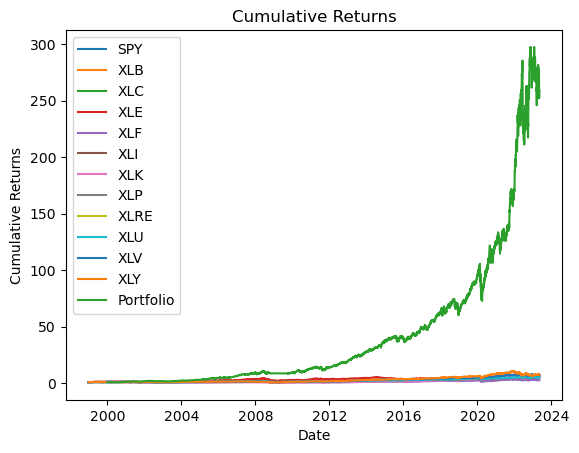

In [423]:
#Gary Antonacci’s Dual Momentum

df_12M_returns = df.pct_change(periods=252)

df_12M_returns['Momentum Signal'] = df_12M_returns[df.columns].max(axis=1).clip(lower=0).fillna(0)
df_12M_returns['Position'] = df_12M_returns['Momentum Signal'] != 0
df_12M_returns['Position'] = df_12M_returns['Position'].astype(int).shift(1).fillna(0)
df_12M_returns=df_12M_returns.ffill()

# Determine the column (from all columns in df_12M_returns DataFrame) that has the maximum value for each row
column_labels = df_12M_returns[df.columns].idxmax(axis=1)
print(column_labels)
# Create a new column in df_12M_returns DataFrame named 'Market Returns'.
# For each row in the df_returns DataFrame, do the following:
# If the column label in 'column_labels' for the current row is NaN, then place NaN in 'Market Returns' for that row.
# Otherwise, place the value from df_returns for that row and the column specified by 'column_labels' in 'Market Returns' for that row.
df_12M_returns['Market Returns'] = df_returns.apply(lambda row: np.nan if pd.isna(column_labels[row.name]) else row[column_labels[row.name]], axis=1)

df_12M_returns['Strategy Returns'] = df_12M_returns['Market Returns'] * df_12M_returns['Position'].shift(1).fillna(0)
print(df_12M_returns['Strategy Returns'].describe())

df_12M_returns['Cumulative Strategy Returns'] = (1+df_12M_returns['Strategy Returns']).cumprod()
df_12M_returns['Cumulative Strategy Returns'] = df_12M_returns['Cumulative Strategy Returns'].replace([np.inf, -np.inf], np.nan).ffill()

print(df_12M_returns.loc['1999-12-17':'1999-12-30','Momentum Signal':])
#df_12M_returns['Momentum Signal'].plot()
#df_12M_returns['Market Returns'].plot()

plt.plot(df.index, df[df.columns]/df.loc['1998-12-22',df.columns], label=df.columns)
plt.plot(df_12M_returns.index, df_12M_returns['Cumulative Strategy Returns'], label='Portfolio')

# Set the title and labels of the plot
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

df_12M_returns

Symbol      SPY  XLB  XLC  XLE  XLF  XLI  XLK  XLP  XLRE  XLU  XLV  XLY
Date                                                                   
1998-12-31    0    0    0    0    0    0    0    0     0    0    0    0
1999-01-31    0    0    0    0    0    0    0    0     0    0    0    0
1999-02-28    0    0    0    0    0    0    0    0     0    0    0    0
1999-03-31    0    0    0    0    0    0    0    0     0    0    0    0
1999-04-30    0    0    0    0    0    0    0    0     0    0    0    0
...         ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...
2023-01-31    0    0    0    1    0    0    0    0     0    0    0    0
2023-02-28    0    0    0    1    0    0    0    0     0    0    0    0
2023-03-31    0    0    0    1    0    0    0    0     0    0    0    0
2023-04-30    0    0    0    1    0    0    0    0     0    0    0    0
2023-05-31    0    0    0    1    0    0    0    0     0    0    0    0

[294 rows x 12 columns]
Symbol      SPY  XLB  XLC  XLE  XLF  XL

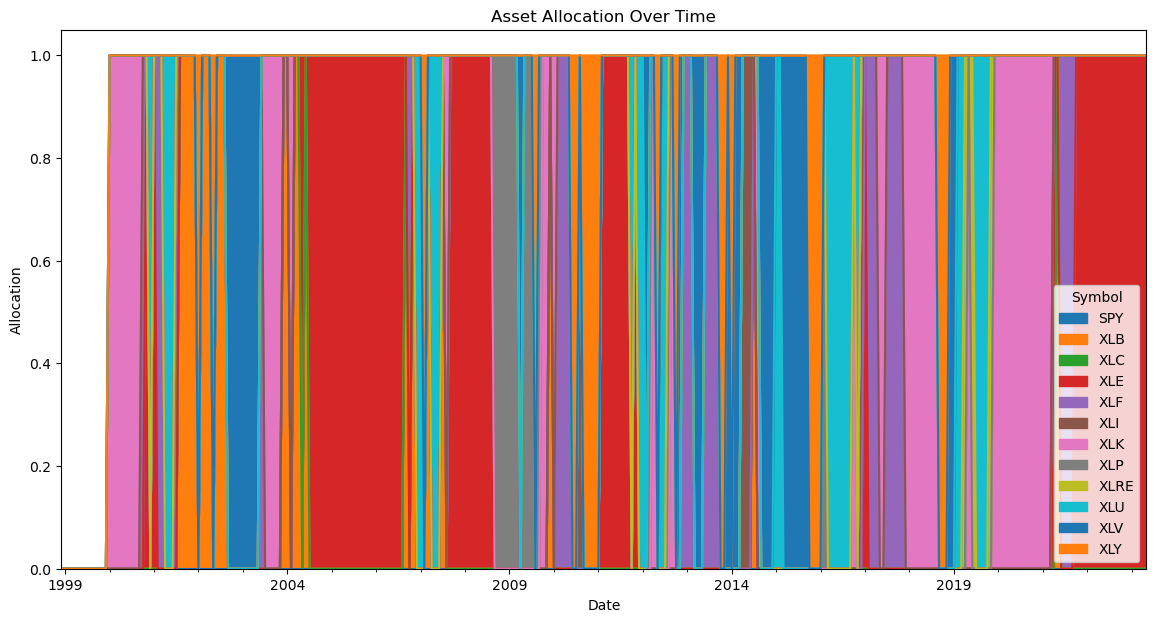

In [440]:
# Create a DataFrame similar to df_weights, but initially fill it with zeros
df_portfolio_allocation = pd.DataFrame(0, index=df.index, columns=df.columns)

# For each date, set the column specified by column_labels to 1 and others to 0
for date in df_portfolio_allocation.index:
    if pd.notna(column_labels.loc[date]):
        # Reset all columns to zero for the current date
        df_portfolio_allocation.loc[date, :] = 0
        # Set the column specified by column_labels to 1 for the current date
        df_portfolio_allocation.loc[date, column_labels.loc[date]] = 1

# Assuming monthly rebalancing, forward fill the weights
df_portfolio_allocation = df_portfolio_allocation.resample('M').first().ffill()
print(df_portfolio_allocation)
print(df_portfolio_allocation[(df_portfolio_allocation.any(axis=1) == 1)])

# Plotting
fig, ax = plt.subplots(figsize=(14,7))
df_portfolio_allocation.plot.area(ax=ax)
ax.set_ylabel('Allocation')
ax.set_title('Asset Allocation Over Time')
plt.show()

## Bonus
- 創造能穩定贏過SPY的投資組合
- 提供更詳盡的報表（如Sharpe Ratio、Max Drawdown等風險指標）


In [308]:
# Bonus

## TODO

End of Exercise 3